<a href="https://colab.research.google.com/github/vikasgtm/Analytics_Vidhya/blob/main/AV_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2
# Submitted by: Vikas Gautam
# mail-id: vikasgtm@gmail.com
# Feature Extraction or Dimension Reduction: using VIF, LASSO, PCA and Factor Analysis

# Category: Equity, Stocks

# Step : Import the required libraries

In [1]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.api import VAR
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
from sklearn.metrics import confusion_matrix

In [2]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 8.1 MB/s eta 0:00:00


In [3]:
!pip install imblearn

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.outliers_influence import variance_inflation_factor
from arch.unitroot import ADF, KPSS
import seaborn as sns
from numpy.linalg import eig

In [5]:
! pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 793.7 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=61278ecfe961892fd0c28a7990fca79691086588b673d0e4efb3f241be9fa972
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [6]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from sklearn import preprocessing

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [8]:
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation
import statsmodels.api as sm
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

plt.rcParams["figure.figsize"] = (10, 8)  # Figure size and width

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from collections import Counter, deque
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Step : Import the dataset from yahoo finance for
# ten stocks: "AAPL","MSFT","META","FORD","GM","TSLA","AMZN","GOOG","IBM","GE"
# from 2019-01 to 2024-06

In [10]:
# Fetch historical data for Apple,"MSFT","META","FORD","GM","TSLA","AMZN","GOOG","IBM","GE"
ticker_symbol = ["AAPL","MSFT","META","FORD","GM","TSLA","AMZN","GOOG","IBM","GE"]
start_date = "2019-01-01"
end_date = "2024-06-30"
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)




[*********************100%%**********************]  10 of 10 completed


In [ ]:
#stock_data.columns

In [11]:
df=pd.DataFrame()
for ticker in ticker_symbol:
    col=("Adj Close",ticker)
    str=ticker+"_Adj_Close"
    df[str]=stock_data[col]
df.head()

,AAPL_Adj_Close,MSFT_Adj_Close,META_Adj_Close,FORD_Adj_Close,GM_Adj_Close,TSLA_Adj_Close,AMZN_Adj_Close,GOOG_Adj_Close,IBM_Adj_Close,GE_Adj_Close
Date,,,,,,,,,,
2019-01-02,37.793785,95.673462,135.401749,13.4,31.238289,20.674667,76.956497,52.233059,84.681984,37.701996
2019-01-03,34.029240,92.153824,131.469833,13.0,29.947525,20.024000,75.014000,50.745255,82.991432,37.748837
2019-01-04,35.481930,96.439827,137.667099,13.4,30.950422,21.179333,78.769501,53.474648,86.232872,38.545036
2019-01-07,35.402946,96.562813,137.766891,13.5,31.906883,22.330667,81.475502,53.358780,86.842972,40.933598
2019-01-08,36.077835,97.262955,142.237717,13.4,32.324753,22.356667,82.829002,53.752831,88.077789,40.090584


# Generating Returns

In [12]:
df2=pd.DataFrame()
for ticker in ticker_symbol:
    str1=ticker+"_Adj_Close"
    str2=ticker+"_Return"
    df2[str2]=df[str1].pct_change()
df2.head()

,AAPL_Return,MSFT_Return,META_Return,FORD_Return,GM_Return,TSLA_Return,AMZN_Return,GOOG_Return,IBM_Return,GE_Return
Date,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.099608,-0.036788,-0.029039,-0.029851,-0.041320,-0.031472,-0.025241,-0.028484,-0.019964,0.001242
2019-01-04,0.042689,0.046509,0.047138,0.030769,0.033488,0.057697,0.050064,0.053786,0.039058,0.021092
2019-01-07,-0.002226,0.001275,0.000725,0.007463,0.030903,0.054361,0.034353,-0.002167,0.007075,0.061968
2019-01-08,0.019063,0.007251,0.032452,-0.007407,0.013097,0.001164,0.016612,0.007385,0.014219,-0.020595


In [ ]:
df.dropna(inplace=True)
df2.dropna(inplace=True)
df.head()

,AAPL_Adj_Close,MSFT_Adj_Close,META_Adj_Close,FORD_Adj_Close,GM_Adj_Close,TSLA_Adj_Close,AMZN_Adj_Close,GOOG_Adj_Close,IBM_Adj_Close,GE_Adj_Close
Date,,,,,,,,,,
2019-01-02,37.845043,95.846016,135.401749,13.400,31.238291,20.674667,76.956497,52.233059,84.681976,37.579563
2019-01-03,34.075397,92.320045,131.469833,13.001,29.947527,20.024000,75.014000,50.745255,82.991425,37.626247
2019-01-04,35.530048,96.613777,137.667099,13.412,30.950415,21.179333,78.769501,53.474648,86.232895,38.419853
2019-01-07,35.450966,96.737000,137.766891,13.500,31.906881,22.330667,81.475502,53.358780,86.842941,40.800667
2019-01-08,36.126774,97.438408,142.237717,13.400,32.324753,22.356667,82.829002,53.752831,88.077782,39.960384


# 3: Multicollinearity

In [13]:
# Calculate daily returns
returns = df.pct_change().dropna()

# Add a constant to the model
X = sm.add_constant(returns)

# Fit the model
model = sm.OLS(returns['AAPL_Adj_Close'], X.drop(columns=['AAPL_Adj_Close'])).fit()

# Print the summary
print(model.summary())

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:         AAPL_Adj_Close   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     245.0
Date:                Tue, 16 Jul 2024   Prob (F-statistic):          5.51e-278
Time:                        21:26:54   Log-Likelihood:                 4110.8
No. Observations:                1381   AIC:                            -8202.
Df Residuals:                    1371   BIC:                            -8149.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0003      0.000      0.

In [14]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
#print(correlation_matrix)



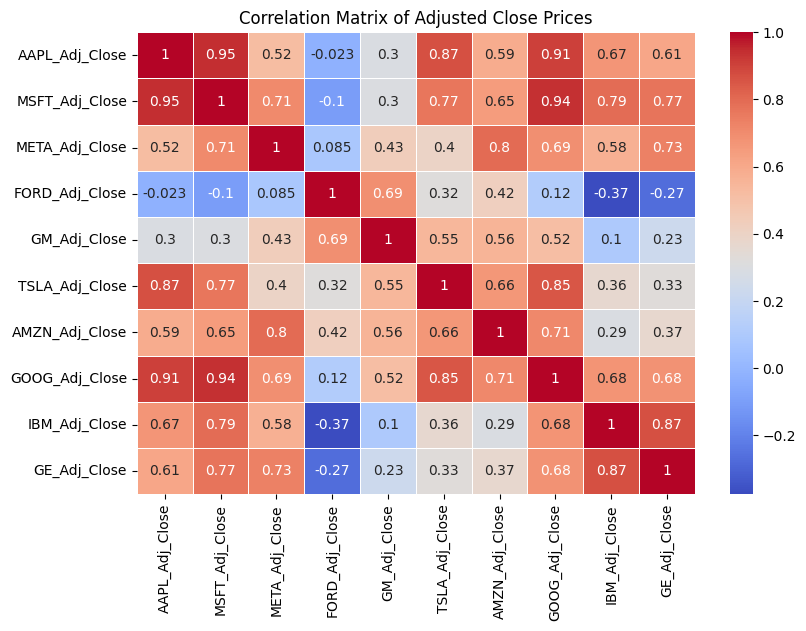

In [ ]:
# Plot the correlation matrix
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Adjusted Close Prices')
plt.show()

In [15]:
# Print VIF values for reference
print(vif_data)

           feature       VIF
0            const  1.008450
1   AAPL_Adj_Close  2.608101
2   MSFT_Adj_Close  3.426609
3   META_Adj_Close  1.999923
4   FORD_Adj_Close  1.042547
5     GM_Adj_Close  1.671067
6   TSLA_Adj_Close  1.428794
7   AMZN_Adj_Close  2.296671
8   GOOG_Adj_Close  2.758918
9    IBM_Adj_Close  1.554342
10    GE_Adj_Close  1.584133


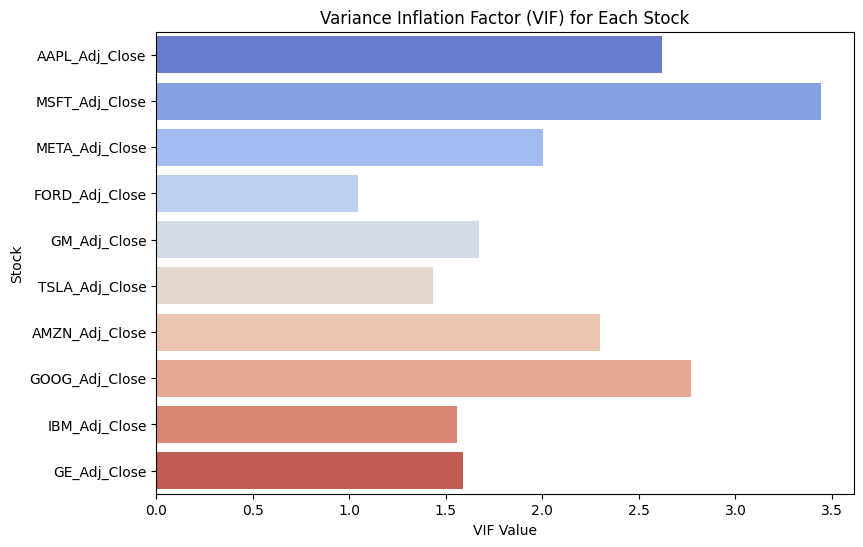

In [17]:
# Calculate VIF without adding a constant
vif_data = pd.DataFrame()
vif_data["feature"] = returns.columns
vif_data["VIF"] = [variance_inflation_factor(returns.values, i) for i in range(returns.shape[1])]

# Plot VIF values
plt.figure(figsize=(9, 6))
sns.barplot(x="VIF", y="feature", data=vif_data, palette="coolwarm")
plt.title('Variance Inflation Factor (VIF) for Each Stock')
plt.xlabel('VIF Value')
plt.ylabel('Stock')
plt.show()

## All VIF values are below 5 and above 1.
## So, here VIF is not able to help us in removing collinear variables..

## 4. Plotting Adj Close and Returns of Stocks

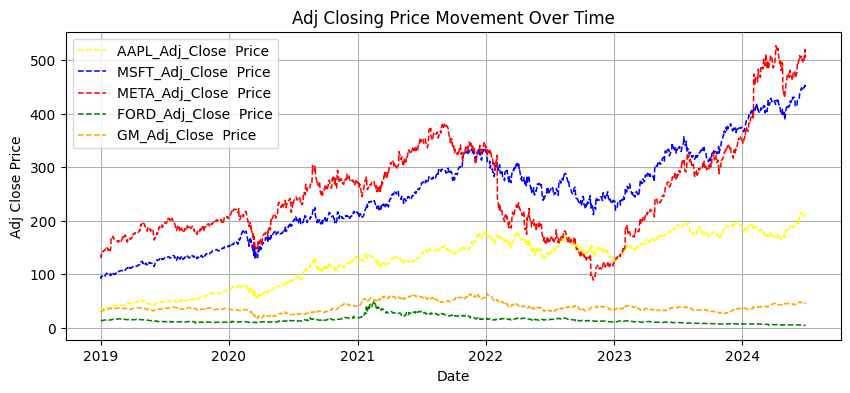

In [18]:
# Plotting the time series of Closing  Prices
fig = plt.subplots(figsize=(10, 4))
color=['yellow','blue','red','green','orange']
for id,col in enumerate(df.columns):

        if id<5:
        #df[col].plot(linewidth=0.8, label="Original "+col+ " stock price")
            plt.plot(df.index, df[col], label=col+'  Price', color=color[id], linestyle='--',linewidth=1.1)

plt.title('Adj Closing Price Movement Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.grid(True)
plt.show()

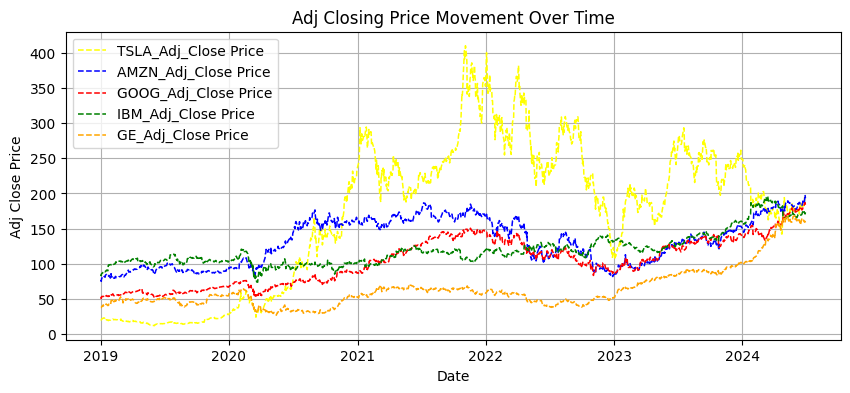

In [20]:
# Plotting the time series of Closing  Prices
fig,ax = plt.subplots(figsize=(10, 4))
color=['yellow','blue','red','green','orange']
for id,col in enumerate(df.columns):

        if id>=5:
        #df[col].plot(linewidth=0.8, label="Original "+col+ " stock price")
            plt.plot(df.index, df[col], label=col+' Price', color=color[id-5], linestyle='--',linewidth=1.1)

plt.title('Adj Closing Price Movement Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.grid(True)
plt.show();

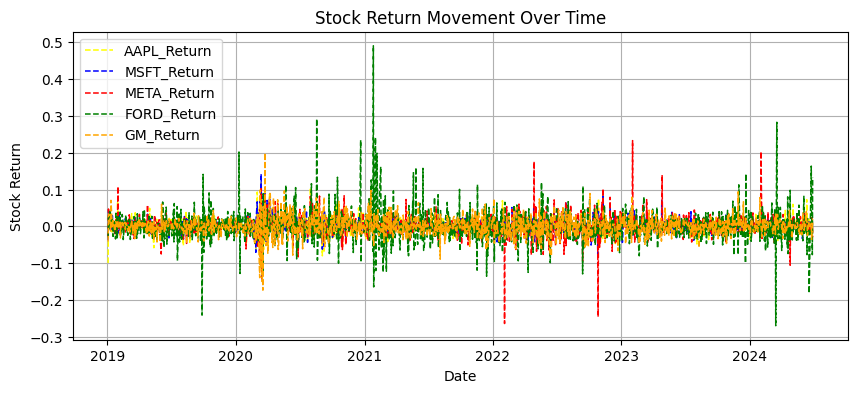

In [21]:
# add to colab
# Plotting the time series of Closing  Prices
fig = plt.subplots(figsize=(10, 4))
color=['yellow','blue','red','green','orange']
for id,col in enumerate(df2.columns):

        if id<5:
        #df[col].plot(linewidth=0.8, label="Original "+col+ " stock price")
            plt.plot(df2.index, df2[col], label=col, color=color[id], linestyle='--',linewidth=1.1)

plt.title('Stock Return Movement Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Return')
plt.legend()
plt.grid(True)
plt.show()

##  5: Feature Extraction or Dimensionality Reduction using PCA on multivariate ## timeseries data

# Let's take a look at the correlation coefficients

In [ ]:
pd.DataFrame(data = np.corrcoef(df.values, rowvar = False))

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.944967,0.518176,-0.023537,0.295090,0.869380,0.590089,0.905411,0.669364,0.610946
1,0.944967,1.000000,0.708356,-0.103077,0.300407,0.767539,0.649860,0.940001,0.793123,0.772916
2,0.518176,0.708356,1.000000,0.085155,0.433451,0.396909,0.798080,0.692391,0.574593,0.731239
3,-0.023537,-0.103077,0.085155,1.000000,0.690998,0.321772,0.424672,0.118769,-0.375483,-0.269495
4,0.295090,0.300407,0.433451,0.690998,1.000000,0.547500,0.556631,0.515736,0.098828,0.229270
5,0.869380,0.767539,0.396909,0.321772,0.547500,1.000000,0.664238,0.853611,0.360930,0.327955
6,0.590089,0.649860,0.798080,0.424672,0.556631,0.664238,1.000000,0.711003,0.291114,0.369747
7,0.905411,0.940001,0.692391,0.118769,0.515736,0.853611,0.711003,1.000000,0.675746,0.677876
8,0.669364,0.793123,0.574593,-0.375483,0.098828,0.360930,0.291114,0.675746,1.000000,0.866655
9,0.610946,0.772916,0.731239,-0.269495,0.229270,0.327955,0.369747,0.677876,0.866655,1.000000


## There are many off-diagonal values in range 0.5 to 1.0, so the columns in ##
## the data are strongly correlated.
## we will apply dimensionality reduction with PCA

## Step : Standardizing the data

In [23]:
X = df.values # getting all values as a matrix of dataframe
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data
X_std

array([[-1.84987753, -1.73791179, -1.27798438, ..., -1.53895808,
        -1.49648592, -0.89553424],
       [-1.92805123, -1.77826317, -1.31965149, ..., -1.58331449,
        -1.56925431, -0.89393395],
       [-1.897885  , -1.72912569, -1.25397811, ..., -1.50194219,
        -1.42972925, -0.86673202],
       ...,
       [ 1.79360695,  2.34907811,  2.72475387, ...,  2.43029778,
         2.25644888,  3.29533198],
       [ 1.81125798,  2.35698874,  2.79299957, ...,  2.47471981,
         2.21254431,  3.29055728],
       [ 1.73899285,  2.28934744,  2.63043927, ...,  2.37216187,
         2.30293665,  3.23837343]])

## Step: Apply PCA

In [24]:
pca = PCA()
X_pca = pca.fit(X_std)

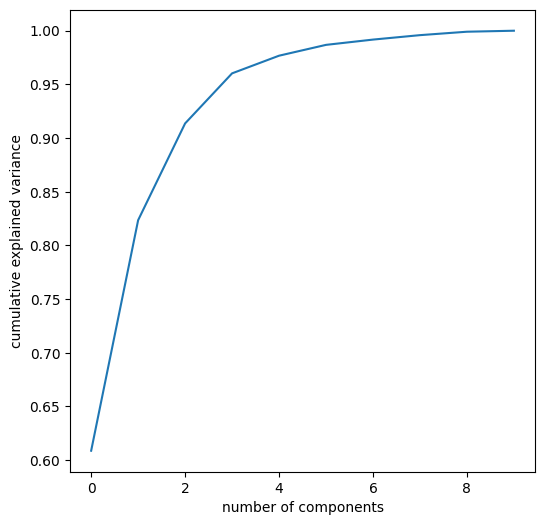

In [25]:
fig=plt.subplots(figsize=(6,6))
plt.plot(np.cumsum(X_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show();

## Step: Determine the number of components which can explain arounf 95%
## variance

In [26]:
pca3 = PCA(n_components = 0.95)
X_pca3 = pca3.fit_transform(X_std) # this will fit and reduce dimensions
print(pca3.n_components_)
# one can print and see how many components are selected. In this case it is 4 same as above we saw in step 5

4


In [27]:
pd.DataFrame(pca3.components_, columns = df.columns)

,AAPL_Adj_Close,MSFT_Adj_Close,META_Adj_Close,FORD_Adj_Close,GM_Adj_Close,TSLA_Adj_Close,AMZN_Adj_Close,GOOG_Adj_Close,IBM_Adj_Close,GE_Adj_Close
0,0.365397,0.392179,0.336967,-0.004591,0.209359,0.302918,0.321188,0.394014,0.316526,0.323921
1,-0.032223,-0.116844,-0.032966,0.646611,0.467837,0.279386,0.252618,0.030021,-0.345289,-0.291970
2,-0.423522,-0.155073,0.512473,0.104797,0.273676,-0.528382,0.217654,-0.118902,0.058934,0.322336
3,0.034209,0.063153,0.319906,-0.092925,-0.573672,0.003846,0.602253,-0.062198,-0.332591,-0.278492


In [28]:
data_pca = pca.fit_transform(X_std)

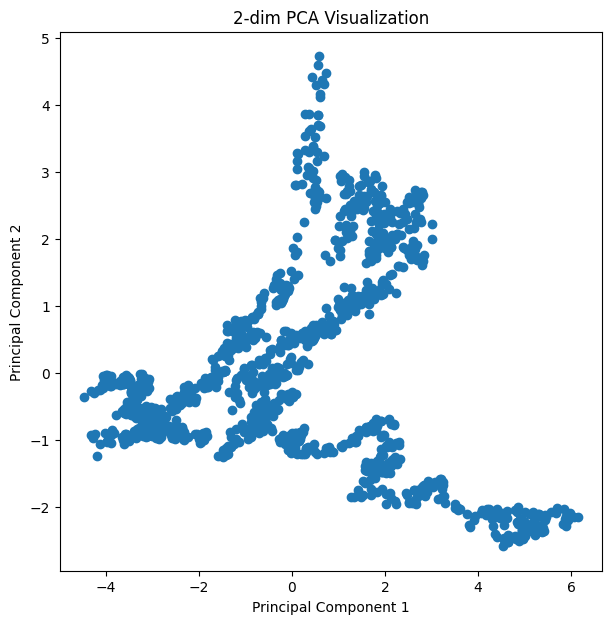

In [29]:
Fig=plt.subplots(figsize=(7,7))
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2-dim PCA Visualization")
plt.show()

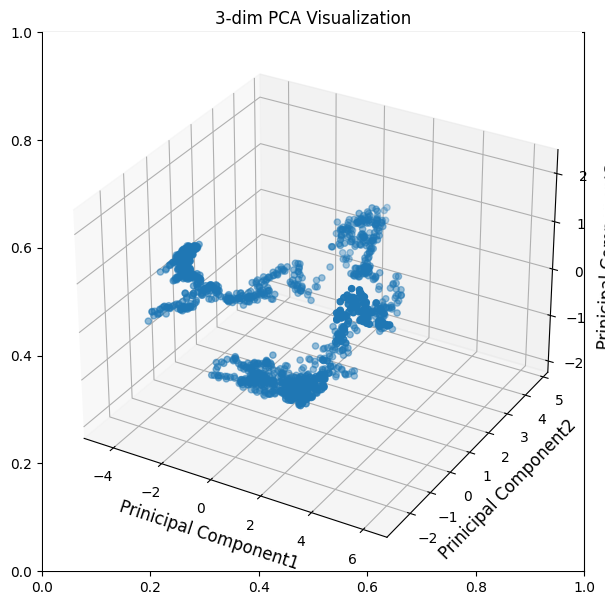

In [30]:
Fig=plt.subplots(figsize=(7,7))

# syntax for 3-D projection
ax = plt.axes(projection ='3d')


ax.scatter(data_pca[:, 0], data_pca[:, 1],data_pca[:,2])

# syntax for plotting
ax.set_title('3d Scatter plot')
ax.set_xlabel('Prinicipal Component1', fontsize=12)
ax.set_ylabel('Prinicipal Component2', fontsize=12,)
ax.set_zlabel('Prinicipal Component3', fontsize=12)
plt.title("3-dim PCA Visualization")
plt.show()

## Step : Finding the most important features set

In [31]:
n_pcs= pca3.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca3.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
print (most_important_names)

['GOOG_Adj_Close', 'FORD_Adj_Close', 'TSLA_Adj_Close', 'AMZN_Adj_Close']


In [32]:
most_important

[7, 3, 5, 6]

## Using these four features to predict IBM Adj Close and then predict AMZN_Adj_CLose




In [33]:
# OLS for IBM_Adj_Close
model_1 = smf.ols(
    "IBM_Adj_Close ~ GOOG_Adj_Close+ FORD_Adj_Close + META_Adj_Close + AMZN_Adj_Close",
    data=df,
).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          IBM_Adj_Close   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     1161.
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:56:55   Log-Likelihood:                -5288.6
No. Observations:                1382   AIC:                         1.059e+04
Df Residuals:                    1377   BIC:                         1.061e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         94.2636      1.289     73.118      0.000      91.735      96.793
GOOG_Adj_Close     0.4903      0.015     33.803      0.000       0.462       0.519
FORD_Adj_Close    -0.9254      0.055    -16.709      0.000      -1.034      -0.817
META_Adj_Close     0.1192      0.007     18.070      0.000       0.106       0.132
AMZN_Adj_Close    -0.3248      0.021    -15.280      0.000      -0.367      -0.283
==============================================================================
Omnibus:                       34.351   Durbin-Watson:                   0.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.344
Skew:                           0.358   Prob(JB):                     7.78e-09
Kurtosis:                       3.368   Cond. No.                     1.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# OLS for AMZN_ADj_Close
model_1 = smf.ols(
    "AMZN_Adj_Close ~ GOOG_Adj_Close+ FORD_Adj_Close + META_Adj_Close + AMZN_Adj_Close",
    data=df,
).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         AMZN_Adj_Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.182e+31
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:58:13   Log-Likelihood:                 39634.
No. Observations:                1382   AIC:                        -7.926e+04
Df Residuals:                    1377   BIC:                        -7.923e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -7.949e-14   9.85e-15     -8.070      0.000   -9.88e-14   -6.02e-14
GOOG_Adj_Close -2.645e-16   1.11e-16     -2.387      0.017   -4.82e-16   -4.71e-17
FORD_Adj_Close -1.393e-14   4.23e-16    -32.925      0.000   -1.48e-14   -1.31e-14
META_Adj_Close -6.011e-16   5.04e-17    -11.925      0.000      -7e-16   -5.02e-16
AMZN_Adj_Close     1.0000   1.62e-16   6.16e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       47.136   Durbin-Watson:                   0.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.320
Skew:                           0.381   Prob(JB):                     2.17e-13
Kurtosis:                       3.657   Cond. No.                     1.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## We treied to predict IBM_Adj_close using these chosen 4 important variables ## and we got R-sqaured as 74%..
## which is good,,so we were able to reduce no of features form 10 to 4..and ##all fours have come as significant..
## if we try topredict AMZN_ADj_Close, we get 100% R-sqaured..using these four ## features...whichis really good..

## 6. Model Comparison from Ridge Regression, and Lasso Regression

## Splitting into train and test dataset

In [35]:
np.random.seed(11111)  # Random seed
nrow = df.shape[0]
train_sequence = sorted(np.random.choice(nrow, int(nrow * 0.8), replace=False))
test_sequence = sorted(set(list(range(0, nrow))) - set(train_sequence))

train = df.iloc[train_sequence,:]
test = df.iloc[test_sequence,:]


In [36]:
train.head()

,AAPL_Adj_Close,MSFT_Adj_Close,META_Adj_Close,FORD_Adj_Close,GM_Adj_Close,TSLA_Adj_Close,AMZN_Adj_Close,GOOG_Adj_Close,IBM_Adj_Close,GE_Adj_Close
Date,,,,,,,,,,
2019-01-02,37.793785,95.673462,135.401749,13.4,31.238289,20.674667,76.956497,52.233059,84.681984,37.701996
2019-01-03,34.029240,92.153824,131.469833,13.0,29.947525,20.024000,75.014000,50.745255,82.991432,37.748837
2019-01-04,35.481930,96.439827,137.667099,13.4,30.950422,21.179333,78.769501,53.474648,86.232872,38.545036
2019-01-07,35.402946,96.562813,137.766891,13.5,31.906883,22.330667,81.475502,53.358780,86.842972,40.933598
2019-01-08,36.077835,97.262955,142.237717,13.4,32.324753,22.356667,82.829002,53.752831,88.077789,40.090584


# we try to predict Amazon Stock Price from other nine variables..

In [37]:
# Make sure X matrix is in matrix form and Y is in vector form
ind_var = ["AAPL_Adj_Close", "MSFT_Adj_Close", "META_Adj_Close", "FORD_Adj_Close", "GM_Adj_Close","TSLA_Adj_Close",
           "GOOG_Adj_Close","IBM_Adj_Close",
           "GE_Adj_Close"]

train_x = train.loc[:, ind_var]
train_y = train.AMZN_Adj_Close
test_x = test.loc[:, ind_var]
test_y = test.AMZN_Adj_Close

test_tot = test.loc[:, ["AMZN_Adj_Close","AAPL_Adj_Close", "MSFT_Adj_Close", "META_Adj_Close", "FORD_Adj_Close",
                        "GM_Adj_Close","TSLA_Adj_Close",
                        "GOOG_Adj_Close","IBM_Adj_Close", "GE_Adj_Close"]]


## Ridge Regression

In [38]:
# generate a sequence of lambdas to try
lambdas = [np.power(10, i) for i in np.arange(4, -4, -0.1)]
alphas = lambdas

# Scale
# train_x_scale = scale(train_x) #In case you want to scale the variables.

# Use 10-fold Cross Validation to find optimal lambda
ridge_cv = RidgeCV(alphas=alphas, cv=10, scoring="neg_mean_squared_error")
ridge_cv.fit(train_x, train_y)

# Build final ridge regression model
ridge_final = Ridge(alpha=ridge_cv.alpha_, fit_intercept=True)
ridge_final.fit(train_x, train_y)

# Print coefficients
# print('Intercept:', ridge_final.intercept_)
print(
    "\n",
    pd.DataFrame(
        (ridge_final.coef_),
        index=ind_var,
        columns=["Coef."],
    ),
)

# R squared formula and mean squared error
ridge_pred = ridge_final.predict(test_x)
ridge_actual = test.AMZN_Adj_Close
ridge_rss = np.sum(np.power(ridge_pred - ridge_actual, 2))
ridge_tss = np.sum(np.power(ridge_actual - np.mean(ridge_actual), 2))
ridge_rsq = 1 - ridge_rss / ridge_tss
print("\n Ridge_R^2", ridge_rsq)

ridge_MSE = np.sqrt(ridge_rss / test.shape[0])
print("Ridge_SME", ridge_MSE)



                    Coef.
AAPL_Adj_Close  0.046541
MSFT_Adj_Close  0.023535
META_Adj_Close  0.331200
FORD_Adj_Close  0.547622
GM_Adj_Close   -0.102502
TSLA_Adj_Close  0.084768
GOOG_Adj_Close  0.047641
IBM_Adj_Close  -0.180738
GE_Adj_Close   -0.361964

 Ridge_R^2 0.8950513252651311
Ridge_SME 10.67595064553099


## LASSO Regression

In [39]:
# generate a sequence of lambdas to try
lambdas = [np.power(10, i) for i in np.arange(6, -6, -0.1)]

# Compile model
lasso_cv = LassoCV(cv=10, alphas=lambdas)
lasso_cv.fit(train_x, train_y)  # Fit Model

# Scale
# train_x_scale = scale(train_x) #In case you want to scale the variables.

# Build final LASSO regression model
lasso_final = Lasso(alpha=lasso_cv.alpha_, fit_intercept=True)
lasso_final.fit(train_x, train_y)

# Print results
# print('Intercept:', lasso_final.intercept_)
print(
    "\n",
    pd.DataFrame(
        (lasso_final.coef_),
        index=ind_var,
        columns=["Coef."],
    ),
)

# R squared formula and mean squared error
lasso_pred = lasso_final.predict(test_x)
lasso_actual = test.AMZN_Adj_Close
lasso_rss = np.sum(np.power(lasso_pred - lasso_actual, 2))
lasso_tss = np.sum(np.power(lasso_actual - np.mean(lasso_actual), 2))
lasso_rsq = 1 - lasso_rss / lasso_tss
print("\n LASSO_R^2: ", lasso_rsq)

lasso_MSE = np.sqrt(lasso_rss / test.shape[0])
print("LASSO_SME: ", lasso_MSE)




                    Coef.
AAPL_Adj_Close -0.000000
MSFT_Adj_Close -0.037529
META_Adj_Close  0.300091
FORD_Adj_Close  0.000000
GM_Adj_Close    0.000000
TSLA_Adj_Close  0.137430
GOOG_Adj_Close -0.000000
IBM_Adj_Close  -0.001206
GE_Adj_Close   -0.212521

 LASSO_R^2:  0.8590628061769404
LASSO_SME:  12.371742950910907


In [40]:
#OLS_df = pd.DataFrame(ols_final.summary2().tables[1]["Coef."]).rename(
#    columns={"Coef.": "OLS"}
#)

Ridge_df = pd.DataFrame(
    np.insert(ridge_final.coef_, 0, ridge_final.intercept_),
    index=["Intercept",
           "AAPL_Adj_Close", "MSFT_Adj_Close", "META_Adj_Close", "FORD_Adj_Close", "GM_Adj_Close","TSLA_Adj_Close",
           "GOOG_Adj_Close","IBM_Adj_Close",
           "GE_Adj_Close"
          ],
    columns=["Ridge"],
)

Lasso_df = pd.DataFrame(
    np.insert(lasso_final.coef_, 0, lasso_final.intercept_),
    index=["Intercept",
           "AAPL_Adj_Close", "MSFT_Adj_Close", "META_Adj_Close", "FORD_Adj_Close", "GM_Adj_Close","TSLA_Adj_Close",
           "GOOG_Adj_Close","IBM_Adj_Close",
           "GE_Adj_Close"
          ],
    columns=["Lasso"],
)

df4 = pd.DataFrame(
        (ridge_final.coef_),
        index=ind_var,
        columns=["Ridge"])

df4 = df4.merge(
                 pd.DataFrame(
        (lasso_final.coef_),
        index=ind_var,
        columns=["Lasso"]),
               left_index=True, right_index=True)

df5 =  pd.DataFrame(
        {
           "Ridge":  [ridge_rsq, ridge_MSE],
           "Lasso":  [lasso_rsq, lasso_MSE],
        },
        index=["R sq", "Mean Sq. Err"],

      )

df4=pd.concat([df4,df5],
    ignore_index=False,
)

print (df4)

                    Ridge      Lasso
AAPL_Adj_Close   0.046541  -0.000000
MSFT_Adj_Close   0.023535  -0.037529
META_Adj_Close   0.331200   0.300091
FORD_Adj_Close   0.547622   0.000000
GM_Adj_Close    -0.102502   0.000000
TSLA_Adj_Close   0.084768   0.137430
GOOG_Adj_Close   0.047641  -0.000000
IBM_Adj_Close   -0.180738  -0.001206
GE_Adj_Close    -0.361964  -0.212521
R sq             0.895051   0.859063
Mean Sq. Err    10.675951  12.371743


## Lasso Penalized Regression has made the coeff of Apple, Ford, Google,
## IBM, GM to equal to zero,,thus reducing the nine variables to four...
## thus helping in feature extraction..
## and coef of MSFT is also close to zero i.e. -0.037 s o we are reduced to
## three and Lasso is giving R-squared as 86%..
## whereas Ridge is giving R-sq as 89.5%


## 7. Feature Extraction: Factor Analysis

In [48]:
data_normal = preprocessing.StandardScaler().fit_transform(df2)
df5 = pd.DataFrame(data_normal, columns=[df2.columns])

In [49]:
df5.dropna(inplace=True)
df5.head()

,AAPL_Return,MSFT_Return,META_Return,FORD_Return,GM_Return,TSLA_Return,AMZN_Return,GOOG_Return,IBM_Return,GE_Return
1,-5.074258,-2.040298,-1.109246,-0.705634,-1.623531,-0.844943,-1.205903,-1.492715,-1.254504,-0.004737
2,2.071192,2.422806,1.673005,0.721433,1.272267,1.376681,2.267698,2.657469,2.336900,0.777981
3,-0.184241,-0.000850,-0.022172,0.172770,1.172184,1.293562,1.543019,-0.165123,0.390779,2.389818
4,0.884791,0.319313,1.136614,-0.177292,0.482904,-0.031826,0.724681,0.316720,0.825485,-0.865823
5,0.780291,0.697010,0.386976,1.051174,0.387395,0.175423,0.037484,-0.131747,0.396979,-0.330130


## Conduct Bartlett's Test and Kaiser-Meyer-Olkin (KMO) Test

In [50]:
# Bartlett's Test
chi_square_value, p_value = calculate_bartlett_sphericity(df5)
print("chi_square_value =", chi_square_value, "\np_value =", p_value)

chi_square_value = 6180.69691394186 
p_value = 0.0


## we got the p-value below 0.05

In [51]:
# Kaiser-Meyer-Olkin (KMO) Test
kmo_all, kmo_model = calculate_kmo(df5)
print("kmo_model =", kmo_model)

kmo_model = 0.8931787262756419


## Create 8-factor object and fit data

In [52]:
# Create 8-factor object and fit data
fa1 = FactorAnalyzer(8, rotation=None)
fact_res = fa1.fit(df)

# Get Eigenvalues
ev, v = fact_res.get_eigenvalues()
ev

array([6.08698692, 2.14781426, 0.90156131, 0.46644967, 0.16447985,
       0.10091497, 0.04918181, 0.04135772, 0.03196397, 0.00928952])

## Visualize eigenvalues on Scree plot


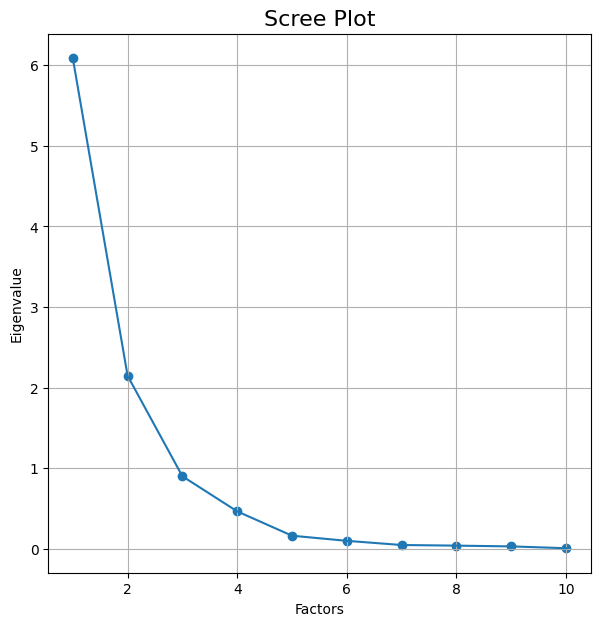

In [60]:
# Visualize eigenvalues on scree plot
Fig=plt.subplots(figsize=(7,7))
plt.scatter(range(1, df5.shape[1] + 1), ev)
plt.plot(range(1, df5.shape[1] + 1), ev)
plt.title("Scree Plot", {"size": 16})
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.grid()
plt.show()

## Results of eigenvalues and visualized Scree plot help us decide number of
## factors. In the Scree plot we can see that 3 eigenvalues are close to 1
## which means that we need to chose 3-factor model.

## Create 3-factor object and fit data

In [54]:
# Create 3-factor object and fit data
fa3 = FactorAnalyzer(3, rotation=None)
fact_res3 = fa3.fit(df)

# Get uniquenesses
pd.DataFrame(
    fact_res3.get_uniquenesses(), index=[df2.columns], columns=["uniquenesses"]
)

,uniquenesses
AAPL_Return,0.034705
MSFT_Return,0.003197
META_Return,0.065825
FORD_Return,0.103770
GM_Return,0.361702
TSLA_Return,0.023755
AMZN_Return,0.253424
GOOG_Return,0.042918
IBM_Return,0.188428
GE_Return,0.131534


# Get Factor Loadings

In [55]:
# Get Factor Loadings
pd.DataFrame(
    fact_res3.loadings_,
    index=[df2.columns],
    columns=["Factor 1", "Factor 2", "Factor 3"]
)

,Factor 1,Factor 2,Factor 3
AAPL_Return,0.905089,-0.029985,-0.381064
MSFT_Return,0.975524,-0.164841,-0.134104
META_Return,0.827166,-0.052058,0.497254
FORD_Return,-0.014685,0.935726,0.142935
GM_Return,0.487233,0.596420,0.212568
TSLA_Return,0.750791,0.439708,-0.468204
AMZN_Return,0.764323,0.345235,0.207845
GOOG_Return,0.973000,0.055473,-0.085295
IBM_Return,0.764045,-0.475933,0.035975
GE_Return,0.788183,-0.418923,0.267837


## Get proportion variance and cumulative proportion variance

In [56]:
# Get proportion variance and cumulative proportion variance
pd.DataFrame(
    fact_res3.get_factor_variance(),
    index=["Sum of squared loadings", "Proportional variance", "Cumulative variance"],
    columns=["Factor 1", "Factor 2", "Factor 3"],
)

,Factor 1,Factor 2,Factor 3
Sum of squared loadings,5.992251,1.979700,0.818790
Proportional variance,0.599225,0.197970,0.081879
Cumulative variance,0.599225,0.797195,0.879074


## Create 3-factor object with varimax or promax rotation and fit data

In [61]:
# Create 3-factor object with varimax rotation and fit data
fa3_varimax = FactorAnalyzer(n_factors=3, rotation="varimax", method="ml")
fact_res3_varimax = fa3_varimax.fit(df5)

# Get loadings
loadings_vrimax = pd.DataFrame(
    fact_res3_varimax.loadings_,
    index=[df2.columns],
    columns=["Factor 1", "Factor 2", "Factor 3"]
)

# Get factor variance
FactorVar_varimax = pd.DataFrame(
    fact_res3_varimax.get_factor_variance(),
    index=["Sum of squared loadings", "Proportional variance", "Cumulative variance"],
    columns=["Factor 1", "Factor 2", "Factor 3"]
)

# print the results
print("Loadings (varimax): \n", loadings_vrimax)
print("\nFactor Variance (varimax): \n", FactorVar_varimax)

Loadings (varimax): 
              Factor 1  Factor 2  Factor 3
AAPL_Return  0.648440  0.327525  0.353302
MSFT_Return  0.724396  0.272103  0.516805
META_Return  0.740930  0.192675  0.051329
FORD_Return  0.189261  0.088082 -0.023240
GM_Return    0.274303  0.684424  0.008576
TSLA_Return  0.443483  0.241600  0.098948
AMZN_Return  0.775780  0.143411  0.156848
GOOG_Return  0.748536  0.271517  0.239948
IBM_Return   0.179502  0.586752  0.286226
GE_Return    0.179185  0.714090  0.042972

Factor Variance (varimax): 
                          Factor 1  Factor 2  Factor 3
Sum of squared loadings  3.028408  1.701492  0.570897
Proportional variance    0.302841  0.170149  0.057090
Cumulative variance      0.302841  0.472990  0.530080


In [62]:
# Create 3-factor object with promax rotation and fit data
fa3_promax = FactorAnalyzer(n_factors=3, rotation="promax", method="ml")
fact_res3_promax = fa3_promax.fit(df5)

# Get loadings
loadings_promax = pd.DataFrame(
    fact_res3_promax.loadings_,
    index=[df2.columns],
    columns=["Factor 1", "Factor 2", "Factor 3"],
)

# Get factor variance
FactorVar_promax = pd.DataFrame(
    fact_res3_promax.get_factor_variance(),
    index=["Sum of squared loadings", "Proportional variance", "Cumulative variance"],
    columns=["Factor 1", "Factor 2", "Factor 3"],
)

# print the results
print("Loadings (promax): \n", loadings_promax)
print("\nFactor Variance (promax): \n", FactorVar_promax)

Loadings (promax): 
              Factor 1  Factor 2  Factor 3
AAPL_Return  0.522077  0.084073  0.349367
MSFT_Return  0.565617 -0.038038  0.537966
META_Return  0.793518 -0.049537  0.001212
FORD_Return  0.204400  0.039371 -0.044331
GM_Return    0.099710  0.697276 -0.049792
TSLA_Return  0.407371  0.104609  0.072116
AMZN_Return  0.809228 -0.139000  0.124654
GOOG_Return  0.703001  0.004331  0.214915
IBM_Return  -0.089766  0.565582  0.284718
GE_Return   -0.035828  0.759312 -0.005725

Factor Variance (promax): 
                          Factor 1  Factor 2  Factor 3
Sum of squared loadings  2.598233  1.425434  0.563936
Proportional variance    0.259823  0.142543  0.056394
Cumulative variance      0.259823  0.402367  0.458760


## Thanks.

In [ ]:
#Vikas G